# Using tabular inputs to build a model

When the number of users or appliances is high, it can be difficult 
to create a model using Python scripts. Therefore, RAMP allows you 
to create inputs in tabular format (`.xlsx`). On the other hand, it is still possible
to use Python to generate a large tabular file with default parameter values, which can
then be more easily customised. In this example, we show
a possible utilisation of this functionality.


In [1]:
from ramp import User, Appliance, UseCase, get_day_type
import pandas as pd

As a first step, one must create `User` classes and assign `Appliances` to the user class without assigning detailed appliance characteristics. Hence, users and their appliances are added to a `UseCase`.

## Building a tabular file populated with default data

In [2]:
# Defining a dict of users with their appliances

user_app = {"household": ["light", "tv"], "school": ["light", "computer"]}

In [3]:
# creating a UseCase class to create the database
use_case = UseCase()

In [4]:
# assinging the appliances to users
for user, apps in user_app.items():
    user_instance = User(user_name=user)

    for app in apps:
        app_instance = user_instance.add_appliance(name=app)
        app_instance.windows()

    use_case.add_user(user_instance)

/home/fl/GitHub-repos/RAMP/ramp/core/core.py:1198: UserWarning: No windows is declared, default window of 24 hours is selected
  warnings.warn(


Once the `Users` and `Appliances` are added to the `use_case` instance, the
model user can get a `pd.DataFrame` or an `.xlsx` file of all the data with the
default values.

### Exporting the database

In [5]:
# getting the dataframe
use_case.export_to_dataframe()

,user_name,num_users,user_preference,name,number,power,num_windows,func_time,time_fraction_random_variability,func_cycle,...,cw32_start,cw32_end,r_c3,window_1_start,window_1_end,window_2_start,window_2_end,window_3_start,window_3_end,random_var_w
0,household,1,0,light,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0
1,household,1,0,tv,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0
2,school,1,0,light,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0
3,school,1,0,computer,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0


In [6]:
# Printing out the database to an .xlsx file
use_case.save("example_excel_usecase")

Once the function is used, an `.xlsx` file will be created in the given
path. Now, you can easily fill out the information in the `.xlsx` file and
load the data into the model database as detailed below.

### Loading the database

In [11]:
# loading data

use_case = UseCase()  # creating a new UseCase instance
use_case.load("example_excel_usecase_filled.xlsx")

## Generating load profiles

Once the database is loaded, the user can continue with the normal analysis, for instance, generating aggregated profiles

In [12]:
n_days = 30
date_start = "2020-01-01"
use_case.date_start = date_start
use_case.initialize(num_days=n_days, force=True)
use_case.generate_daily_load_profiles()

You will simulate 30 day(s) from 2020-01-01 00:00:00 until 2020-01-31 00:00:00


array([0.   , 0.   , 0.   , ..., 0.002, 0.002, 0.002])

<Axes: title={'center': 'Usecase'}>

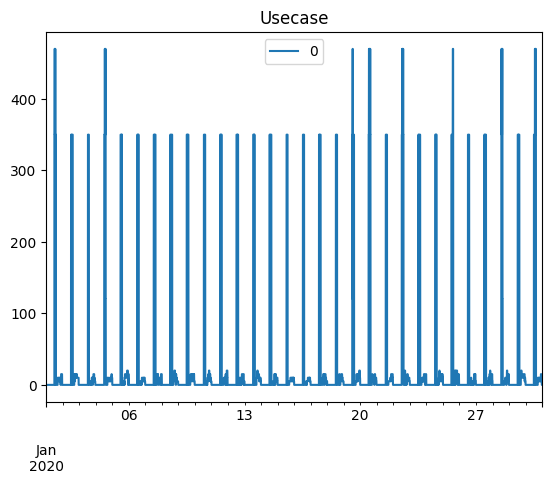

In [13]:
profiles = pd.DataFrame(
    data=use_case.generate_daily_load_profiles(flat=True),
    index=pd.date_range(start=date_start, periods=1440 * n_days, freq="T"),
)

profiles.plot(title="Usecase")

### Generating load profiles for the single users of the usecase

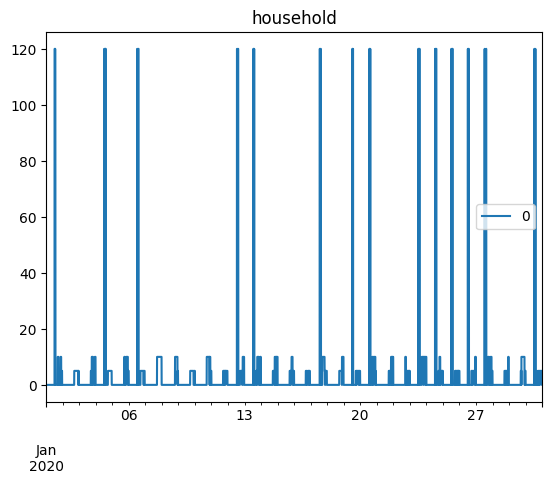

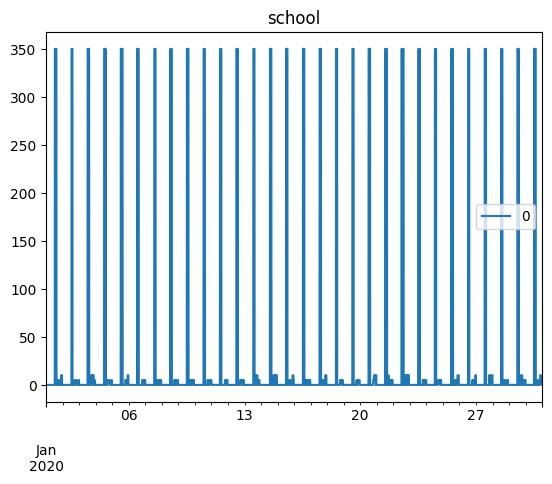

In [14]:
for user in use_case.users:
    user_profiles = []
    for day_idx, day in enumerate(use_case.days):
        profile = user.generate_aggregated_load_profile(
            prof_i=day_idx,
            peak_time_range=use_case.peak_time_range,
            day_type=get_day_type(day),
        )

        user_profiles.extend(profile)

    profiles = pd.DataFrame(
        data=user_profiles,
        index=pd.date_range(start=date_start, periods=1440 * n_days, freq="T"),
    )

    profiles.plot(title=user.user_name)